# Adding a region

The next step is to add a region which we will call "R2". This requires a similar process to before of modifying the input simulation data. However, we will also have to change the ```settings.toml``` file to achieve this.

The process to change the ```settings.toml``` file is relatively simple. We just have to add our new region to the ```regions``` variable, in the 4th line of the ```settings.toml``` file, like so:

    regions = ["R1", "R2"]

The process to change the input files, however, takes a bit more time. To achieve this, there must be data for each of the sectors for the new region. This, therefore, requires the modification of every input file.

Due to space constraints, we will not show you how to edit all of the files. However, you can access the modified files [here INSERT LINK HERE](github-link).

Effectively, for this example, we will copy and paste the results for each of the input files from region "R1", and change the name of the region for the new rows to "R2". 

However, as we are increasing the demand by adding a region, as well as modifying the costs of technologies, it may be the case that a higher growth in technology is required. For example, there may be no possible solution to meet demand without increasing the ```windturbine``` maximum allowed limit. We will therefore increase the allowed limits for ```windturbine``` in region "R2".

Feel free, however, to experiment with the data values to observe different scenarios.

We have placed two examples as to how to edit the residential sector below. Again, the editted data are highlighted in **bold**, with the original data in normal text.

The following file is the modified ```/technodata/residential/CommIn.csv``` file:

|ProcessName|RegionName|Time|Level|electricity|gas|heat|CO2f|wind|
|-|-|-|-|-|-|-|-|-|
|Unit|-|Year|-|PJ/PJ|PJ/PJ|PJ/PJ|kt/PJ|PJ/PJ|
|gasboiler|R1|2020|fixed|0|1.16|0|0|0|
|heatpump|R1|2020|fixed|0.4|0|0|0|0|
|**gasboiler**|**R2**|**2020**|**fixed**|**0**|**1.16**|**0**|**0**|**0**|
|**heatpump**|**R2**|**2020**|**fixed**|**0.4**|**0**|**0**|**0**|**0**|

Whereas the following file is the modified ```/technodata/residential/ExistingCapacity.csv``` file:

|ProcessName|RegionName|Unit|2020|2025|2030|2035|2040|2045|2050|
|-|-|-|-|-|-|-|-|-|-|
|gasboiler|R1|PJ/y|10|5|0|0|0|0|0|
|heatpump|R1|PJ/y|0|0|0|0|0|0|0|
|**gasboiler**|**R2**|**PJ/y**|**10**|**5**|**0**|**0**|**0**|**0**|**0**|
|**heatpump**|**R2**|**PJ/y**|**0**|**0**|**0**|**0**|**0**|**0**|**0**|

Below is the reduced ```/technodata/power/technodata.csv``` file, showing the increased capacity for ```windturbine``` in "R2". For this, we highlighted only the editted elements which were changed from the copy and pasted from elements from "R1". The rest of the elements are the same for "R1" as they are for "R2".

|ProcessName|RegionName|…|MaxCapacityAddition|MaxCapacityGrowth|TotalCapacityLimit|…|Agent2|Agent1|
|-|-|-|-|-|-|-|-|-|
|Unit|-|…|PJ|%|PJ|…|Retrofit|New|
|gasCCGT|R1|…|2|0.02|60|…|1|0|
|windturbine|R1|…|2|0.02|60|…|1|0|
|solarPV|R1|…|2|0.02|60|…|1|0|
|gasCCGT|R2|…|2|0.02|60|…|1|0|
|windturbine|R2|…|**5**|**0.05**|**100**|…|1|0|
|solarPV|R2|…|2|0.02|60|…|1|0|


Again, we will run the results using the ```python -m pip muse settings.toml``` in anaconda prompt, and analyse the data as follows:

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

gas sector:


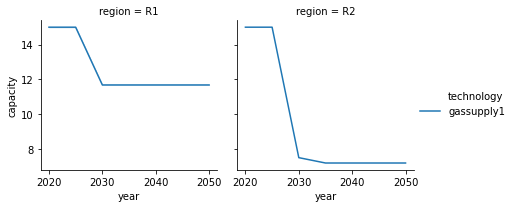

power sector:


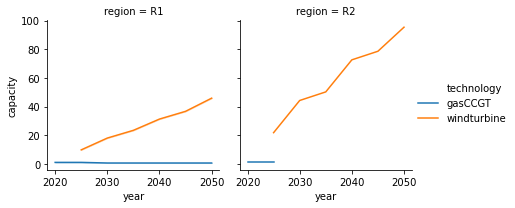

residential sector:


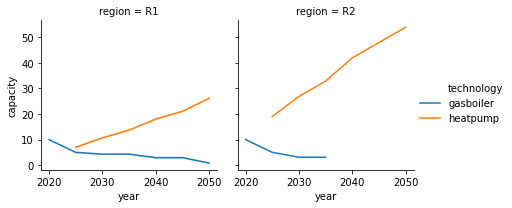

In [33]:
mca_capacity = pd.read_csv("../Results/MCACapacity.csv")

for name, sector in mca_capacity.groupby("sector"):
    print("{} sector:".format(name))
    g = sns.FacetGrid(data=sector, col="region")
    g.map(sns.lineplot, "year", "capacity", "technology")
    g.add_legend()
    plt.show()

The plots above show a divergence in regions. Region "R2" was able to grow the amount of ```windturbine``` faster than "R1", which is evident by a higher uptake that R1. 